In [3]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Metrics
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

In [4]:
pd.set_option('max_colwidth', 200)

In [5]:
data = pd.read_csv('./kaggle_data/PB_All_2000_2021.csv', sep=';', header=0)
data

id        date    NH4  BSK5  Suspended     O2    NO3    NO2     SO4  \
0      1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.00   
1      1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.00   
2      1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.00   
3      1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.20   
4      1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.60   
...   ..         ...    ...   ...        ...    ...    ...    ...     ...   
2856  22  06.10.2020  0.046  2.69        3.6   8.28   3.80  0.038  160.00   
2857  22  27.10.2020  0.000  1.52        0.5  11.26   0.56  0.031  147.20   
2858  22  03.12.2020  0.034  0.29        0.8  11.09   2.58  0.042  209.92   
2859  22  12.01.2021  0.000  2.10        0.0  14.31   3.94  0.034  121.60   
2860  22  10.02.2021  0.000  1.78        0.0  14.30   6.30  0.033  134.40   

        PO4       CL  
0     0.454   289.50  
1     0.090  1792.00  
2     0.200  2509.00  
3     0.377  1264.00  
4     0.134  1462.00  
...     ...      ...  
2856  0.726    77.85  
2857  0.634    71.95  
2858  0.484    61.17  
2859  0.424    63.49  
2860  0.582    66.31  

[2861 rows x 11 columns]

In [6]:
# Information for training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [8]:
# Download data about monitoring stations
data_about = pd.read_csv('./kaggle_data/PB_stations.csv', sep=';', header=0, encoding='cp1251')
data_about.sort_values(by=['length'], ascending=False)

id  length  \
20  21   773.0   
19  20   755.0   
18  19   744.0   
17  18   711.0   
16  17   692.0   
15  16   652.0   
14  15   607.0   
13  14   582.0   
12  13   569.5   
11  12   537.0   
9   10   413.0   
8    9   400.0   
7    8   372.0   
6    7   327.0   
5    6   316.0   
4    5   237.0   
3    4   206.0   
2    3   153.0   
1    2   136.0   
21  22    97.0   
10  11    50.0   
0    1     0.5   

                                                                                                               name_station  
20                                                         р. Південний Буг, 773 км, смт. Чорний Острів, Мар'янівське вдсх.  
19                                                            р. Південний Буг, 755 км, м. Хмельницький , Хмельницьке вдсх.  
18                                                              р. Південний Буг, 744 км, с. Копистин, нижче м.Хмельницький  
17                                                             р. Південний Буг, 711 км,  смт. Меджибіж, Меджибіжське вдсх.  
16                                                                   р. Південний Буг, 692 км, с. Щедрове, Щедрівське вдсх.  
15                                                            р. Південний Буг, 652 км, м. Хмільник, питний в/з, вище міста  
14                                          р. Південний Буг, 607 км, с. Гущинці, нижче села , питний водозабір м.Калинівка  
13                                    р. Південний Буг, 582 км, м. Вінниця, Сабарівське вдсх,  питний в/з міста, вище міста  
12   р. Південний Буг, 569,5 км, 500 м нижче скиду ВОКВП ВКГ "Вінницяводоканал"   (1,5 км нижче греблі Сабарівського вдсх.)  
11                                                           р. Південний Буг, 537 км, смт. Сутиски, Сутиське вдсх., н/б'єф  
9                                                   р. Південний Буг, 413 км, с. Маньківка, вище села, питний в/з м.Ладижин  
8                                                                   р. Південний Буг, 400 км, м. Ладижин, Ладижинське вдсх.  
7                                                                 р. Південний Буг, 372 км, с. Глибочок, Глибочекське вдсх.  
6                                            р. Південний Буг, 327 км, с. Ставки, кордон Вінницької та Кіровоградської обл.  
5                                                                  р. Південний Буг, 316 км, м.Гайворон, Гайворонське вдсх.  
4                                                                   р. Південний Буг, 237 км, питний водозабір смт Побузьке  
3                                                              р. Південний Буг, 206 км, м. Первомайськ, Первомайське вдсх.  
2                                                 р. Південний Буг, 153 км, с. Олексіівка, питний в/з м. Південно-Українськ  
1                                                         р. Південний Буг, 136 км, с. Олександрівка, Олександрівське вдсх.  
21  р. Південний Буг, 97 км, м. Вознесенськ, пит.в/з м. Вознесенськ, 2 км до в'їзду у м. Вознесенськ по трасі з м. Миколаїв  
10                                                                р. Південний Буг, 50 км, с. Ковалівка, Південно-Бузька ЗС  
0           р. Південний Буг, 0,5 км, м. Миколаїв, Бузький лиман, тех. в/з Миколаївської ТЕЦ (ліва частина морського порту)

<AxesSubplot:>

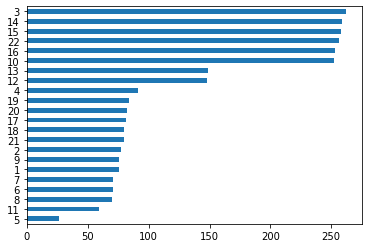

In [9]:
data['id'].value_counts().sort_values().plot(kind='barh')

In [10]:
data['ds'] = pd.to_datetime(data['date'])
data['year'] = data['ds'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   object        
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  ds         2861 non-null   datetime64[ns]
 12  year       2861 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 290.7+ KB


In [13]:
date_lim = pd.concat([data[['id', 'year']].groupby(by=['id']).min().sort_values(by=['year'], ascending=False), data[['id', 'year']].groupby(by=['id']).max().sort_values(by=['year'], ascending=False)], axis=1, join='outer')

In [14]:
date_lim

year  year
id            
5   2019  2021
13  2006  2018
1   2000  2018
21  2000  2018
20  2000  2018
19  2000  2018
18  2000  2018
17  2000  2018
16  2000  2021
15  2000  2021
14  2000  2021
12  2000  2018
2   2000  2018
11  2000  2018
10  2000  2021
9   2000  2018
8   2000  2018
7   2000  2018
6   2000  2018
4   2000  2018
3   2000  2021
22  2000  2021

In [17]:
# Information about stations 14, 15, 16
stations_good = [14, 15, 16]
data_about[data_about['id'].isin(stations_good)]

id  length  \
13  14   582.0   
14  15   607.0   
15  16   652.0   

                                                                             name_station  
13  р. Південний Буг, 582 км, м. Вінниця, Сабарівське вдсх,  питний в/з міста, вище міста  
14        р. Південний Буг, 607 км, с. Гущинці, нижче села , питний водозабір м.Калинівка  
15                          р. Південний Буг, 652 км, м. Хмільник, питний в/з, вище міста

In [18]:
# Set target indicator
target_data_name = 'BSK5'
#feature_target_all = ['NH4', 'BSK5', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
feature_target_all = ['NH4', 'NO3']
feature_data_all = feature_target_all + [target_data_name]
feature_data_all

['NH4', 'NO3', 'BSK5']

In [19]:
# Data sampling only for good stations
df_indicator = data[['id', 'ds'] + feature_data_all]
df_indicator = df_indicator[df_indicator['id'].isin(stations_good)].dropna().reset_index(drop=True)
df_indicator

id         ds   NH4   NO3  BSK5
0    14 2000-10-01  1.30  6.30   1.9
1    14 2000-01-02  2.20  8.80   2.5
2    14 2000-01-03  0.68  8.80   4.1
3    14 2000-04-04  0.81  4.60   3.4
4    14 2000-05-16  0.27  3.00   3.0
..   ..        ...   ...   ...   ...
763  16 2020-08-12  0.17  3.38   5.6
764  16 2021-01-28  0.26  2.01   5.4
765  16 2021-02-16  1.64  7.71   6.8
766  16 2021-03-16  2.29  7.70   4.4
767  16 2021-06-04  0.16  6.38   6.1

[768 rows x 5 columns]

In [20]:
cols = []
for station in stations_good:
    for feature in feature_data_all:
        cols.append(str(station) + "_" + feature)
cols

['14_NH4',
 '14_NO3',
 '14_BSK5',
 '15_NH4',
 '15_NO3',
 '15_BSK5',
 '16_NH4',
 '16_NO3',
 '16_BSK5']

In [21]:
df = pd.pivot_table(df_indicator, index=["ds"], columns=["id"], values=feature_data_all).dropna()
df.columns = cols
df

14_NH4  14_NO3  14_BSK5  15_NH4  15_NO3  15_BSK5  16_NH4  16_NO3  \
ds                                                                             
2000-01-02     2.5     2.7      3.1    2.20    2.20     2.40    8.80    8.40   
2000-01-03     4.1     4.4      6.0    0.68    0.87     0.54    8.80    9.10   
2000-01-08     2.9     3.4      9.3    0.37    0.25     0.14    1.50    7.00   
2000-04-04     3.4     3.1      3.4    0.81    1.22     0.51    4.60    4.90   
2000-04-07     4.4     5.3      7.6    0.10    0.07     0.14    2.30    2.10   
...            ...     ...      ...     ...     ...      ...     ...     ...   
2020-12-08     6.2     6.8      6.0    0.57    0.28     0.20    0.68    1.03   
2021-01-28     6.4     5.6      5.4    0.21    0.27     0.26    2.95    3.27   
2021-02-16    11.6     6.2      6.8    2.52    1.92     1.64   13.79    7.95   
2021-03-16     6.2     4.2      4.4    1.03    1.38     2.29   10.90    8.56   
2021-06-04     5.6     6.2      6.1    0.43    0.17     0.16    6.57    8.07   

            16_BSK5  
ds                   
2000-01-02     7.70  
2000-01-03     8.80  
2000-01-08     0.90  
2000-04-04     3.50  
2000-04-07     1.70  
...             ...  
2020-12-08     0.71  
2021-01-28     2.01  
2021-02-16     7.71  
2021-03-16     7.70  
2021-06-04     6.38  

[239 rows x 9 columns]

<AxesSubplot:xlabel='ds'>

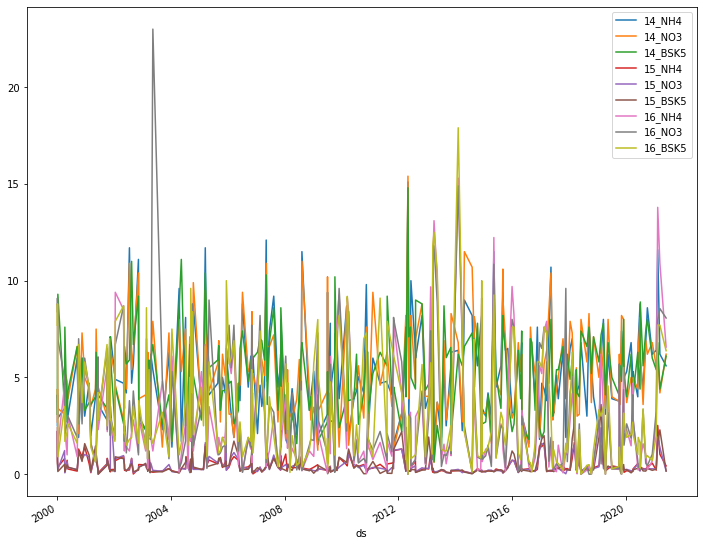

In [22]:
# Data visualization
df.plot(figsize=(12,10))

In [25]:
# EDA with Pandas Profiling
pp.ProfileReport(df)

Render HTML: 100%|███████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


In [26]:
# Set target data
target_name = '14_' + target_data_name
target_data = df.pop(target_name)
target_data

ds
2000-01-02    3.1
2000-01-03    6.0
2000-01-08    9.3
2000-04-04    3.4
2000-04-07    7.6
             ... 
2020-12-08    6.0
2021-01-28    5.4
2021-02-16    6.8
2021-03-16    4.4
2021-06-04    6.1
Name: 14_BSK5, Length: 239, dtype: float64

In [27]:
# Dividing data into training and test
train, test, target, target_test = train_test_split(df, target_data, test_size=0.25, random_state=0)
print(train.shape, test.shape)

(179, 8) (60, 8)


In [28]:
# Display the statistics for training data
train.describe()

14_NH4      14_NO3      15_NH4      15_NO3     15_BSK5      16_NH4  \
count  179.000000  179.000000  179.000000  179.000000  179.000000  179.000000   
mean     5.095754    5.153966    0.447626    0.460816    0.483140    3.110056   
std      2.282459    2.243354    0.426128    0.489682    0.554987    2.989136   
min      1.200000    0.620000    0.010000    0.000000    0.000000    0.000000   
25%      3.500000    3.600000    0.180000    0.190000    0.160000    0.800000   
50%      4.700000    5.000000    0.300000    0.290000    0.260000    1.900000   
75%      6.400000    6.500000    0.540000    0.485000    0.545000    4.750000   
max     11.700000   11.300000    2.680000    3.500000    3.600000   13.790000   

           16_NO3     16_BSK5  
count  179.000000  179.000000  
mean     3.428212    3.533631  
std      3.203378    2.805721  
min      0.000000    0.000000  
25%      0.955000    1.200000  
50%      2.500000    2.600000  
75%      5.075000    5.700000  
max     23.000000   12.500000

In [29]:
# Display the statistics for test data
test.describe()

14_NH4     14_NO3     15_NH4     15_NO3    15_BSK5     16_NH4  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    5.121500   5.459667   0.373267   0.357567   0.383000   2.203067   
std     2.656615   2.639714   0.302669   0.277844   0.364025   2.739223   
min     1.600000   2.000000   0.040000   0.022000   0.020000   0.000000   
25%     3.145000   3.650000   0.190000   0.190000   0.180000   0.517500   
50%     4.550000   4.925000   0.270000   0.260000   0.230000   1.250000   
75%     6.225000   6.650000   0.422500   0.440000   0.435000   2.775000   
max    15.100000  15.400000   1.620000   1.480000   1.990000  15.300000   

          16_NO3    16_BSK5  
count  60.000000  60.000000  
mean    2.452833   2.496333  
std     2.846391   2.919597  
min     0.000000   0.000000  
25%     0.600000   0.940000  
50%     1.500000   1.600000  
75%     3.027500   2.550000  
max    14.900000  17.900000

In [30]:
# Standartization data
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)

# Display training data
train

14_NH4    14_NO3    15_NH4    15_NO3   15_BSK5    16_NH4    16_NO3  \
0   -0.305682 -0.694641 -0.159143 -0.104064 -0.294777 -0.966210 -1.026232   
1   -0.173876 -0.247629  0.146785 -0.308851 -0.800708 -0.493179 -0.381357   
2    0.616959  1.227509 -0.559203 -0.491111 -0.498956 -0.114083  0.257257   
3    1.891083  2.255635 -0.418006 -0.452202 -0.439328 -0.912533 -0.810230   
4   -0.657164 -0.292331 -0.888664 -0.943691 -0.872984 -0.271760 -0.196659   
..        ...       ...       ...       ...       ...       ...       ...   
174 -0.393552 -0.918147 -0.182676 -0.022149 -0.023742  0.935979  1.337267   
175 -0.393552 -0.337032 -0.653335 -0.493159 -0.583880 -0.946081 -0.850926   
176 -1.360129 -1.633365  1.511696  1.145137  1.475983  1.774688  1.556399   
177 -0.657164 -0.560537  1.088103  0.633170  0.699017  0.634045  0.523347   
178  1.363859  1.719221 -0.888664 -0.820819 -0.728432 -0.607243 -0.509706   

      16_BSK5  
0   -0.973465  
1    1.989500  
2   -0.047762  
3   -0.598180  
4   -0.262210  
..        ...  
174  0.774291  
175 -1.141450  
176  1.574900  
177  1.203189  
178 -0.440918  

[179 rows x 8 columns]

In [31]:
# Standartization data
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [32]:
# Training data splitting to new training (part of the all training) and validation data
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.2, random_state=0)

In [33]:
# Display information about new training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 55 to 172
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   14_NH4   143 non-null    float64
 1   14_NO3   143 non-null    float64
 2   15_NH4   143 non-null    float64
 3   15_NO3   143 non-null    float64
 4   15_BSK5  143 non-null    float64
 5   16_NH4   143 non-null    float64
 6   16_NO3   143 non-null    float64
 7   16_BSK5  143 non-null    float64
dtypes: float64(8)
memory usage: 10.1 KB


In [34]:
# Display information about validation data
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 137 to 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   14_NH4   36 non-null     float64
 1   14_NO3   36 non-null     float64
 2   15_NH4   36 non-null     float64
 3   15_NO3   36 non-null     float64
 4   15_BSK5  36 non-null     float64
 5   16_NH4   36 non-null     float64
 6   16_NO3   36 non-null     float64
 7   16_BSK5  36 non-null     float64
dtypes: float64(8)
memory usage: 2.5 KB


In [35]:
# Cross-validation of training data with shuffle
cv_train = ShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

In [36]:
# Creation the dataframe with the resulting score of all models
result = pd.DataFrame({'model' : ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor'], 
                       'train_score': 0, 'valid_score': 0})
result

model  train_score  valid_score
0        Linear Regression            0            0
1  Random Forest Regressor            0            0
2        XGBoost Regressor            0            0

In [37]:
# Linear Regression
lr = LinearRegression()
lr.fit(train, target_train)

# Prediction for training data
y_train_lr = lr.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_lr), 2)
print(f'Accuracy of Linear Regression model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'Linear Regression', 'train_score'] = r2_score_acc

Accuracy of Linear Regression model training is 0.48


In [38]:
# Print rounded r2_lr = lr.predict(valid)
y_val_lr = lr.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_lr),2)
result.loc[result['model'] == 'Linear Regression', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of Linear Regression model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of Linear Regression model prediction for valid dataset is 0.24


In [39]:
%%time
# Random Forest Regressor
rf = RandomForestRegressor()
param_grid = {'n_estimators': [10, 20, 50], 'min_samples_leaf': [i for i in range(4,7)], 
              'max_features': ['auto'], 'max_depth': [i for i in range(3,6)], 
              'criterion': ['mse'], 'bootstrap': [False]}

# Training model
rf_CV = GridSearchCV(rf, param_grid=param_grid, cv=cv_train, verbose=False)
rf_CV.fit(train, target_train)
print(rf_CV.best_params_)

# Prediction for training data
y_train_rf = rf_CV.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_rf),2)
print(f'Accuracy of RandomForestRegressor model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'Random Forest Regressor', 'train_score'] = r2_score_acc

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 20}
Accuracy of RandomForestRegressor model training is 0.55
CPU times: user 1.98 s, sys: 11 ms, total: 1.99 s
Wall time: 1.99 s


In [40]:
# Print rounded r2_score_acc to 2 decimal values after the text
y_val_rf = rf_CV.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_rf),2)
result.loc[result['model'] == 'Random Forest Regressor', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of RandomForestRegressor model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of RandomForestRegressor model prediction for valid dataset is 0.32


In [41]:
%%time
# XGBoost Regressor
xgbr = xgb.XGBRegressor() 
# parameters = {'n_estimators': [60, 70, 80, 90, 95, 100, 105, 110, 120, 130, 140], 
#               'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1],
#               'max_depth': [3, 5, 7, 9],
#               'reg_lambda': [0.1, 0.3, 0.5]}

parameters = {'n_estimators': [60, 75, 100], 
              'learning_rate': [0.02, 0.05],
              'max_depth': [4, 5],
              'reg_lambda': [0.1, 0.3]}

# Training model
xgb_CV = GridSearchCV(estimator=xgbr, param_grid=parameters, cv=cv_train, n_jobs=-1)
xgb_CV.fit(train, target_train)
print("Best score: %0.3f" % xgb_CV.best_score_)
print("Best parameters set:", xgb_CV.best_params_)

# Prediction for training data
y_train_xgb = xgb_CV.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_xgb),2)
print(f'Accuracy of XGBoost Regressor model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'XGBoost Regressor', 'train_score'] = r2_score_acc

Best score: 0.039
Best parameters set: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 60, 'reg_lambda': 0.1}
Accuracy of XGBoost Regressor model training is 0.9
CPU times: user 43.3 s, sys: 242 ms, total: 43.5 s
Wall time: 9.2 s


In [42]:
# Print rounded r2_score_acc to 2 decimal values after the text
y_val_xgb = xgb_CV.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_xgb),2)
result.loc[result['model'] == 'XGBoost Regressor', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of XGBoost Regressor model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of XGBoost Regressor model prediction for valid dataset is 0.21


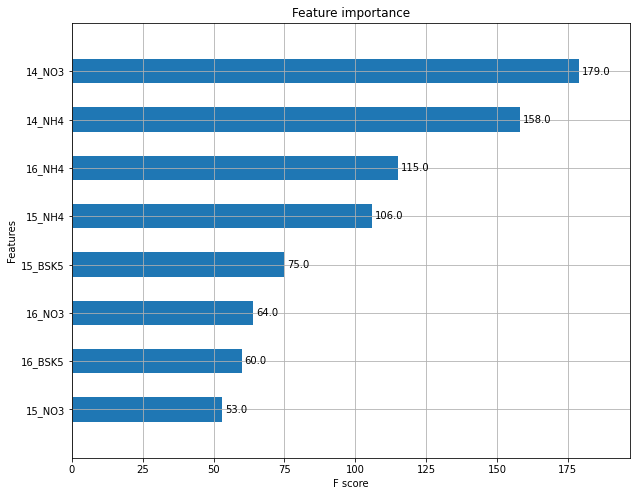

In [43]:
# Feature importance diagram
xgbr = xgb.XGBRegressor(**xgb_CV.best_params_)
xgbr.fit(train, target_train)
fig =  plt.figure(figsize = (10,8))
axes = fig.add_subplot(111)
xgb.plot_importance(xgbr,ax = axes,height = 0.5)
plt.show();
plt.close()

In [44]:
# Prediction of target for test data for all models
y_test_lr = lr.predict(test)
y_test_rf = rf_CV.predict(test)
y_test_xgb = xgb_CV.predict(test)

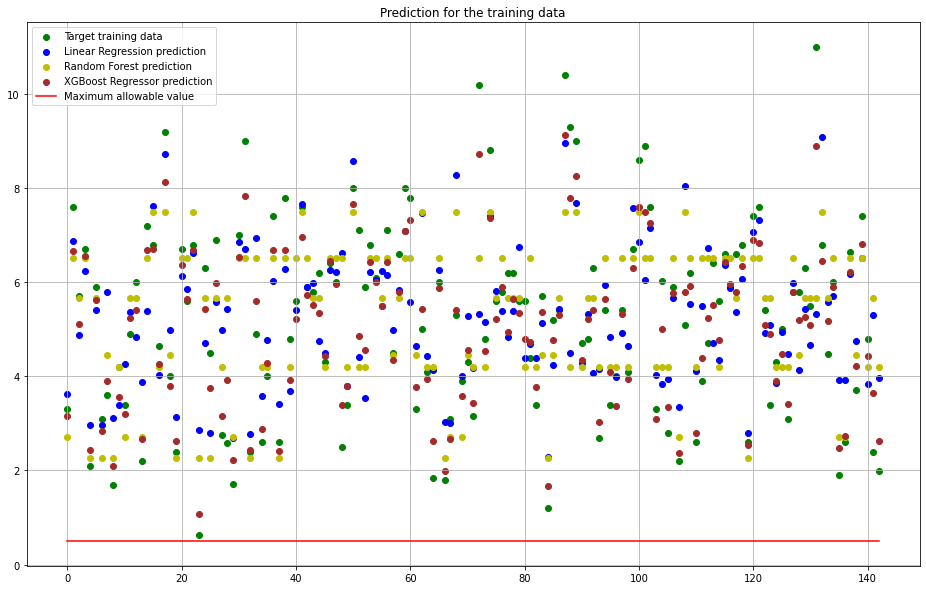

In [45]:
# Building plot for prediction for the training data 
x = np.arange(len(train))
plt.figure(figsize=(16,10))
plt.scatter(x, target_train, label = "Target training data", color = 'g')
plt.scatter(x, y_train_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_train_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_train_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(train), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the training data')
plt.legend(loc='best')
plt.grid(True)

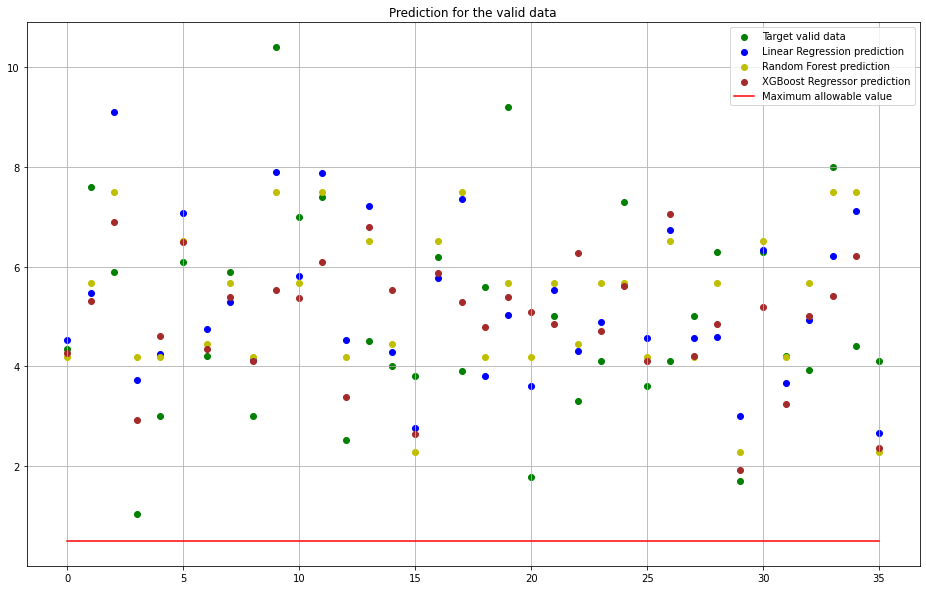

In [46]:
# Building plot for prediction for the valid data 
x = np.arange(len(valid))
plt.figure(figsize=(16,10))
plt.scatter(x, target_valid, label = "Target valid data", color = 'g')
plt.scatter(x, y_val_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_val_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_val_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(valid), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the valid data')
plt.legend(loc='best')
plt.grid(True)

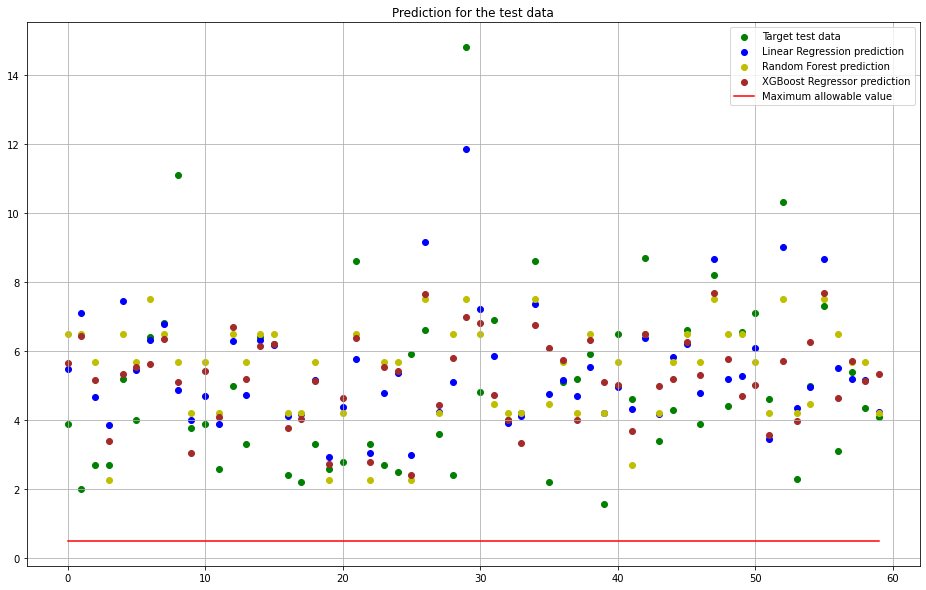

In [47]:
# Building plot for prediction for the test data 
x = np.arange(len(test))
plt.figure(figsize=(16,10))
plt.scatter(x, target_test, label = "Target test data", color = 'g')
plt.scatter(x, y_test_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_test_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_test_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(test), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

In [48]:
# Display results of modeling
result.sort_values(by=['valid_score', 'train_score'], ascending=False)

model  train_score  valid_score
1  Random Forest Regressor         0.55         0.32
0        Linear Regression         0.48         0.24
2        XGBoost Regressor         0.90         0.21

In [49]:
# Select models
#result_best = result[(result['train_score'] - result['valid_score']).abs() < 0.15]
result_best = result
result_best.sort_values(by=['valid_score', 'train_score'], ascending=False)

model  train_score  valid_score
1  Random Forest Regressor         0.55         0.32
0        Linear Regression         0.48         0.24
2        XGBoost Regressor         0.90         0.21

In [50]:
# Select the best model
result_best.nlargest(1, 'valid_score')

model  train_score  valid_score
1  Random Forest Regressor         0.55         0.32

In [51]:
# Find a name of the best model (with maximal valid score)
best_model_name = result_best.loc[result_best['valid_score'].idxmax(result_best['valid_score'].max()), 'model']

In [52]:
print(f'The best model is "{best_model_name}"')

The best model is "Random Forest Regressor"
